# IS 362 – Week 8 Assignment  

Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables. 
Here is a link to the “Auto MPG” dataset in the UC Irvine data repository:  https://archive.ics.uci.edu/ml/datasets/Auto+MPG

## Import modules

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series 
import seaborn as sns 
%matplotlib inline
import pylab as pl
from pandas import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



## Then read in data, specifying column names, and index by car name

In [27]:
cars = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']).set_index('car_name')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1


## Replace ‘?’ values in the horsepower column with a pandas-appropriate missing value, then convert the column to numeric.

In [21]:
cars = cars.replace('?', np.nan)
cars['horsepower'].astype(float)

car_name
"chevrolet chevelle malibu"    130.0
"buick skylark 320"            165.0
"plymouth satellite"           150.0
"amc rebel sst"                150.0
"ford torino"                  140.0
                               ...  
"ford mustang gl"               86.0
"vw pickup"                     52.0
"dodge rampage"                 84.0
"ford ranger"                   79.0
"chevy s-10"                    82.0
Name: horsepower, Length: 398, dtype: float64

## Convert the origin column values from 1, 2, and 3 to ‘USA’, ‘Asia’, and ‘Europe’.

In [22]:
cars["origin"].replace([1,2,3], (['USA', 'Asia', 'Europe']), inplace=True)
cars.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
"""chrysler lebaron medallion""",26.0,4,156.0,92.00,2585.0,14.5,82,USA
"""ford granada l""",22.0,6,232.0,112.0,2835.0,14.7,82,USA
"""toyota celica gt""",32.0,4,144.0,96.00,2665.0,13.9,82,Europe
"""dodge charger 2.2""",36.0,4,135.0,84.00,2370.0,13.0,82,USA
"""chevrolet camaro""",27.0,4,151.0,90.00,2950.0,17.3,82,USA
"""ford mustang gl""",27.0,4,140.0,86.00,2790.0,15.6,82,USA
"""vw pickup""",44.0,4,97.0,52.00,2130.0,24.6,82,Asia
"""dodge rampage""",32.0,4,135.0,84.00,2295.0,11.6,82,USA
"""ford ranger""",28.0,4,120.0,79.00,2625.0,18.6,82,USA


## Create a bar chart that shows the distribution for cylinders.

<AxesSubplot:title={'center':'Cylinder Distribution'}, xlabel='cylinders'>

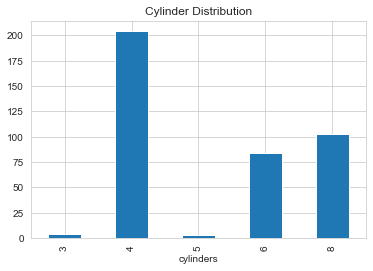

In [23]:
sns.set_style('whitegrid')
newset = cars.groupby('cylinders')
newset['cylinders'].count().plot.bar(title="Cylinder Distribution")

## Create a scatterplot that shows the relationship between horsepower and weight.

Text(0, 0.5, 'Horsepower')

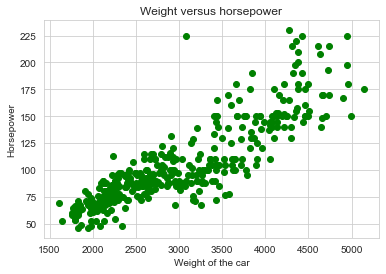

In [24]:
x = cars['horsepower'].astype(np.float16)
y = cars['weight'].astype(np.float16)
plt.scatter(y, x, c='green')
plt.title("Weight versus horsepower")
plt.xlabel("Weight of the car")
plt.ylabel("Horsepower")

## Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset. 

### How is horsepower and miles per gallon distributed among different countries?

<AxesSubplot:title={'center':'Car Specs By Origin'}, xlabel='origin'>

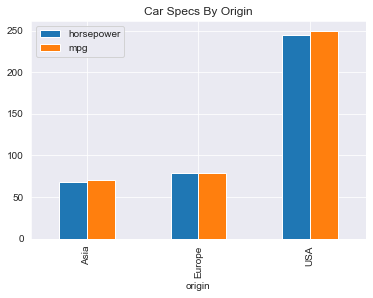

In [25]:
sns.set_style('darkgrid')
newset = cars.groupby('origin')
newset['horsepower','mpg'].count().plot.bar(title="Car Specs By Origin")



### How is horsepower, acceleration, and weight distributed by model year?

<AxesSubplot:title={'center':'Car Specs by Year'}, xlabel='model_year'>

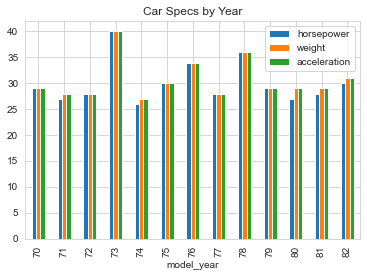

In [26]:
sns.set_style('whitegrid')
newset = cars.groupby('model_year')
newset['horsepower','weight','acceleration'].count().plot.bar(title="Car Specs by Year")